              Open    High      Low    Close  Volume
2024-06-21  2947.2  2947.2  2880.50  2912.20  897460
2024-06-20  2925.1  2964.9  2900.80  2947.25   99020
2024-06-19  2971.4  2975.2  2911.25  2917.20   97510
2024-06-18  2970.2  2974.0  2941.20  2961.40  108020
2024-06-14  2936.1  2958.7  2913.40  2954.55  186350


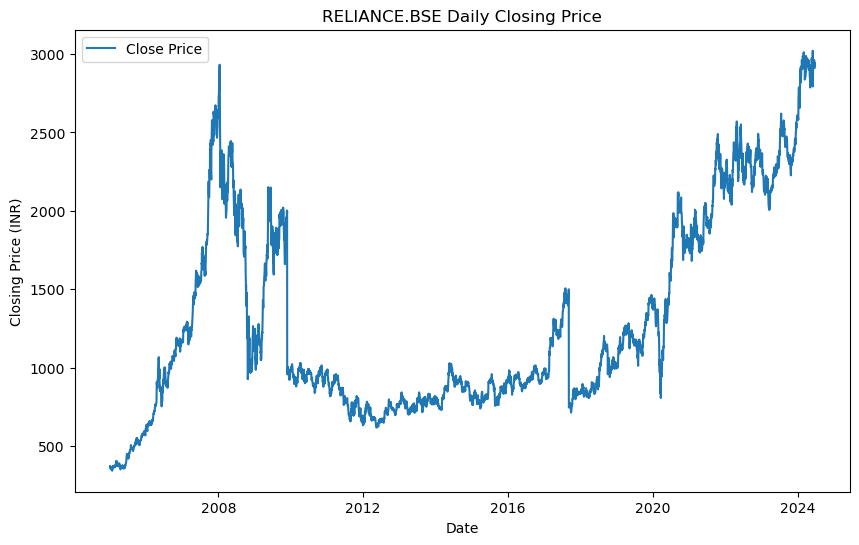

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


api_key = 'W37Y2JMPTW2IYKP6'  # generate Api key through this " https://www.alphavantage.co/ " link
symbol = 'RELIANCE.BSE'
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"

response = requests.get(url)
data = response.json()


time_series = data['Time Series (Daily)']

# Convert time series data into a DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')
df = df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
})

# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Convert columns to numeric
df = df.apply(pd.to_numeric)


print(df.head())

# plot the close price
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('RELIANCE.BSE Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()


In [2]:
df.describe()

,Open,High,Low,Close,Volume
count,4798.000000,4798.000000,4798.000000,4798.000000,4.798000e+03
mean,1299.781763,1316.298065,1282.802283,1299.034690,2.929945e+06
std,641.388542,649.367342,633.463241,641.388051,2.050845e+07
min,344.152500,347.798500,339.518500,341.699200,0.000000e+00
25%,826.371650,835.715750,815.899400,826.029775,4.099882e+05
50%,998.223300,1013.515700,984.594600,997.083750,8.428220e+05
75%,1838.121625,1870.415200,1811.194525,1837.756375,2.487326e+06
max,3011.700000,3029.900000,2975.050000,3021.250000,8.021841e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4798 entries, 2024-06-21 to 2005-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4798 non-null   float64
 1   High    4798 non-null   float64
 2   Low     4798 non-null   float64
 3   Close   4798 non-null   float64
 4   Volume  4798 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 224.9 KB


In [4]:
df1 = df.reset_index()['Close']

In [5]:
df1.head()

0    2912.20
1    2947.25
2    2917.20
3    2961.40
4    2954.55
Name: Close, dtype: float64

In [6]:
df1.shape

(4798,)

In [7]:
# check for the null values
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

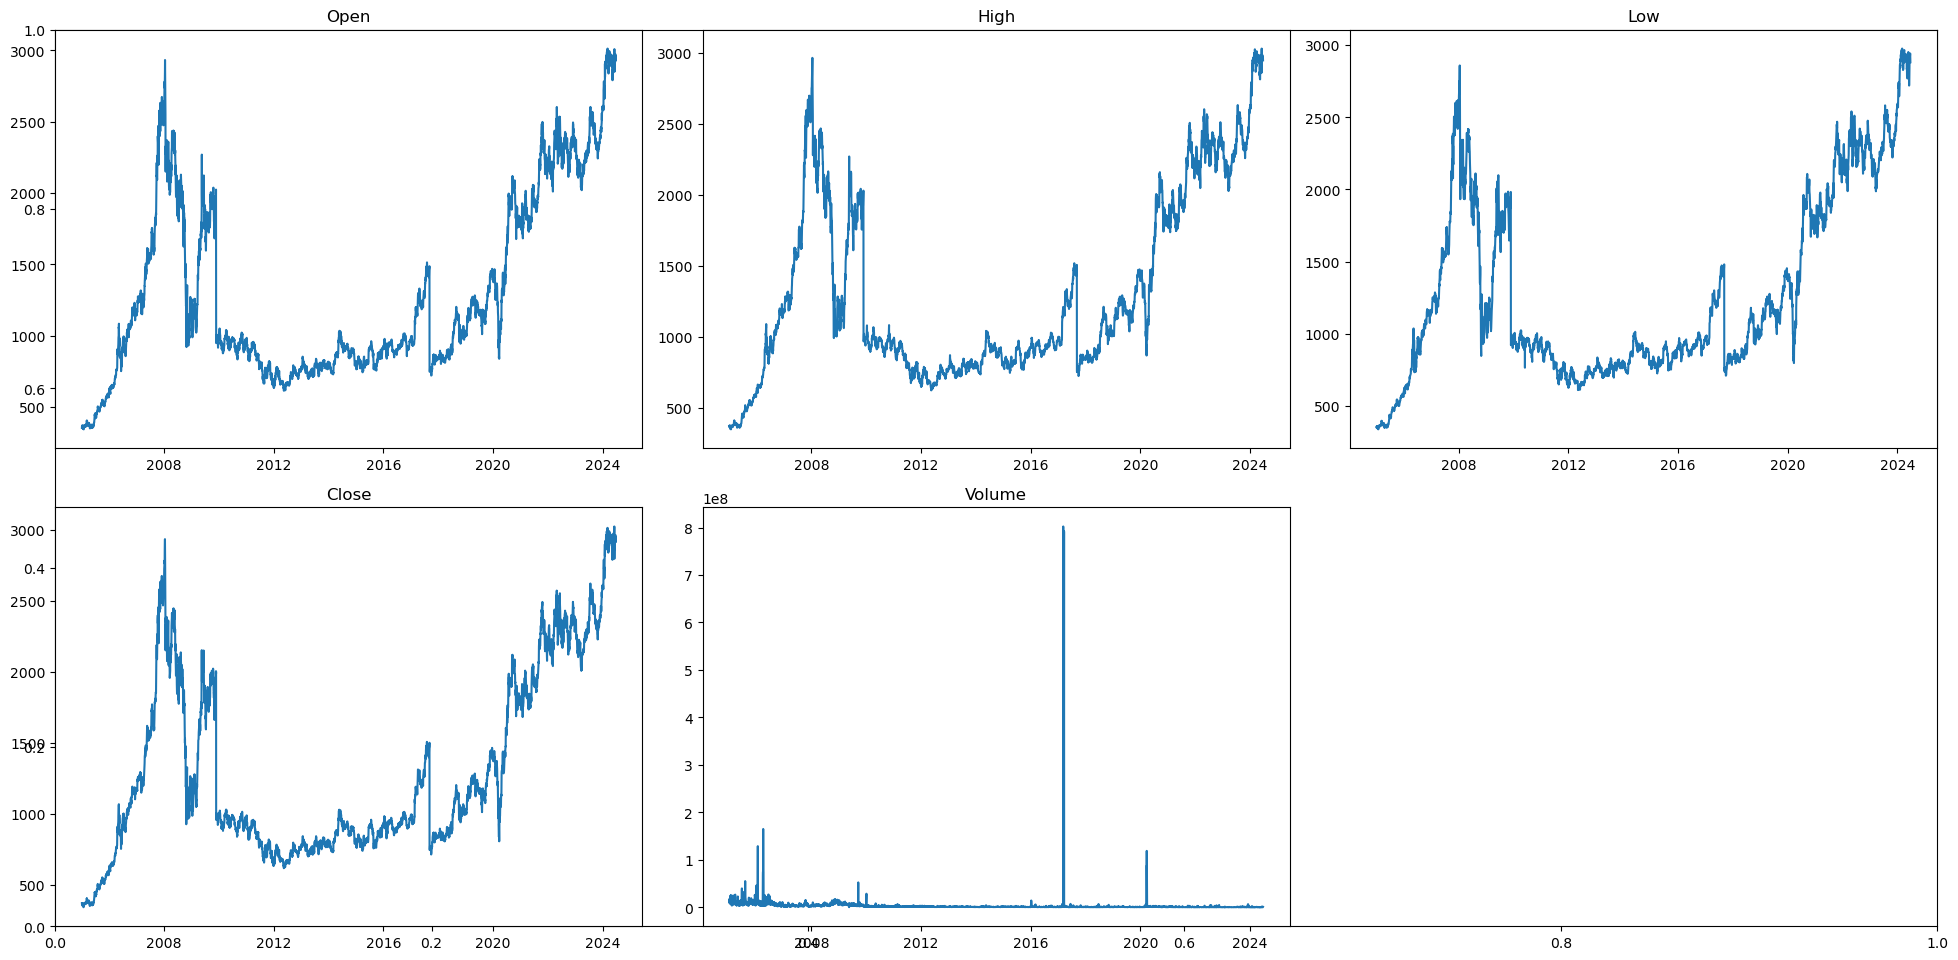

In [7]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create a 20x10 inches figure
plt.subplots(figsize=(20, 10))

# Plot each feature in a 2x3 grid
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.plot(df[col])
    plt.title(col)  

# Display the plots
plt.tight_layout() 
plt.show()

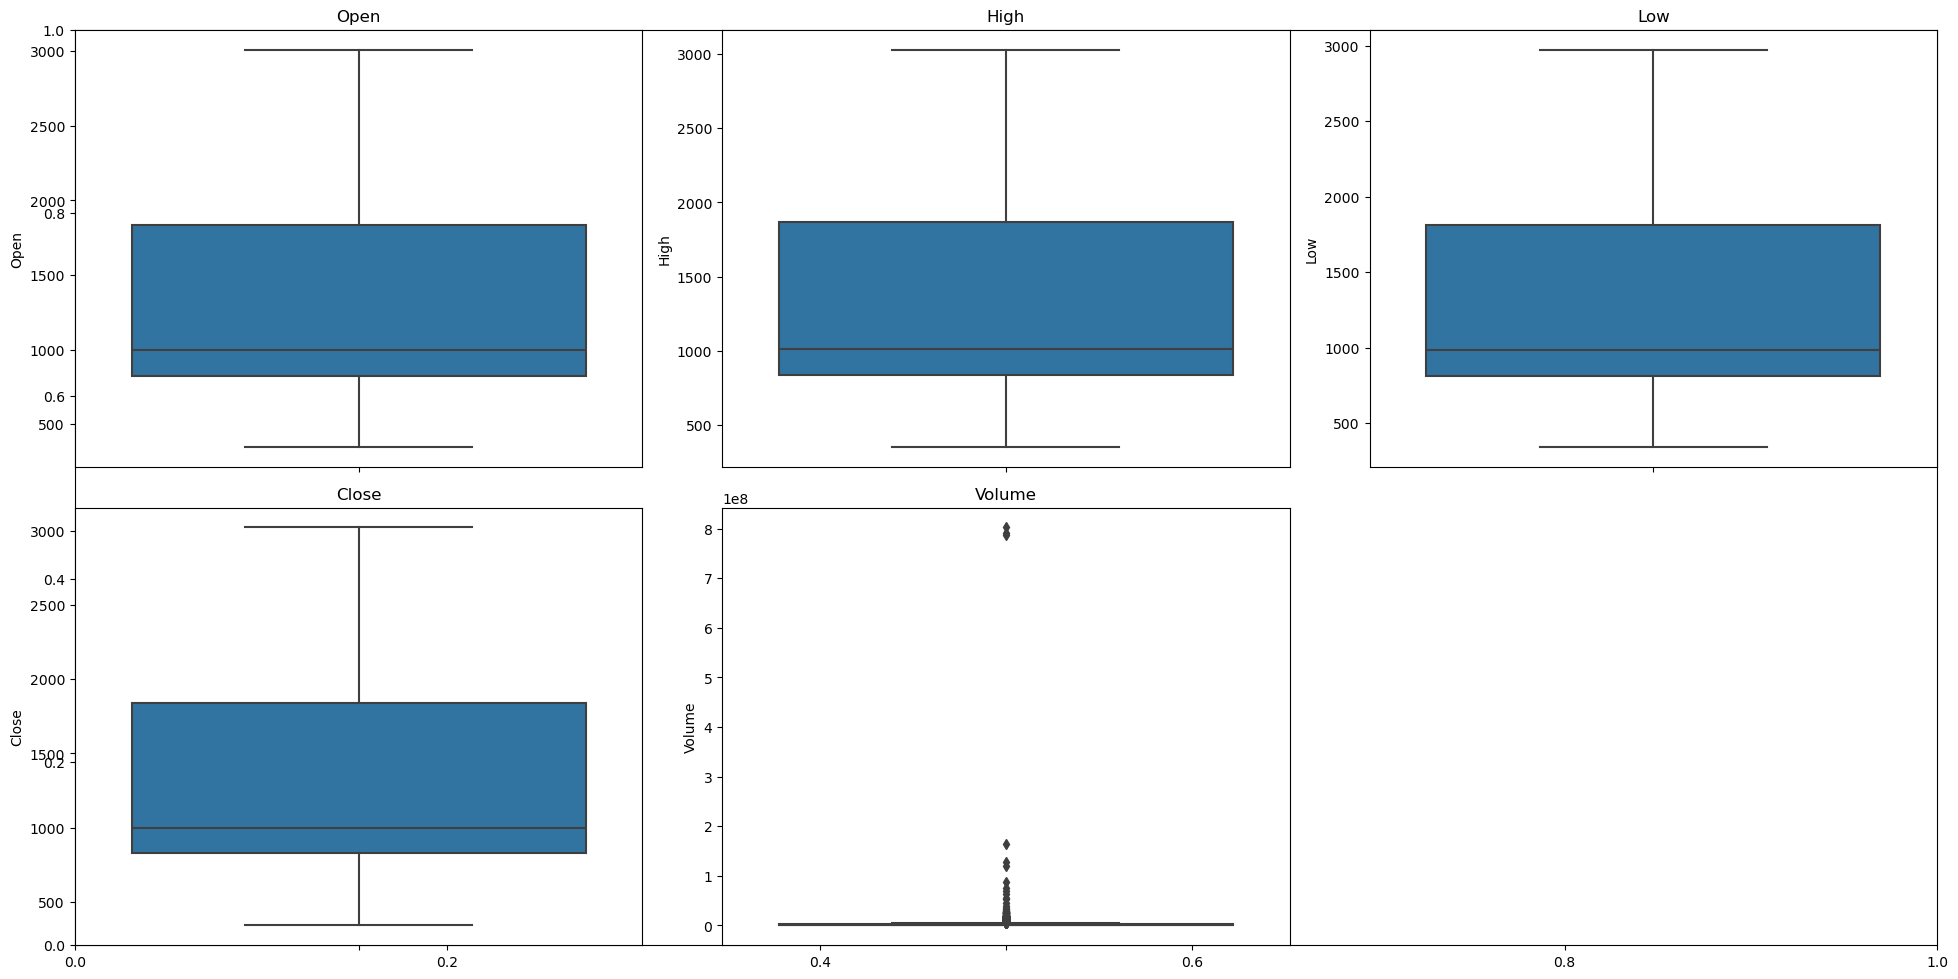

In [8]:
import seaborn as sb
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.boxplot(y=df[col])  
    plt.title(col)  

plt.tight_layout() 
plt.show()

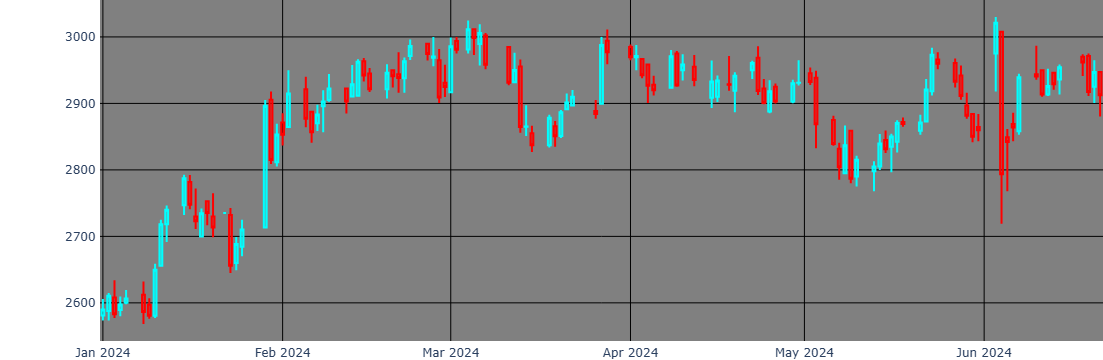

In [18]:
# plot candelstick 
dfpl = df[0:119]
import plotly.graph_objects as go
candlestick = go.Candlestick(x=dfpl.index,
                             
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close'],
                             increasing_line_color='cyan', decreasing_line_color='red')
fig = go.Figure(data=candlestick)
fig.update(layout_xaxis_rangeslider_visible=False)  
fig.update_layout(paper_bgcolor = "white", plot_bgcolor = "gray",
                 margin_l=100,margin_b=0, margin_r=0, margin_t=0)
fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='black')
fig.show() 

In [19]:
df1

0       2912.2000
1       2947.2500
2       2917.2000
3       2961.4000
4       2954.5500
          ...    
4793     368.5840
4794     358.4297
4795     361.1217
4796     361.7351
4797     370.1173
Name: Close, Length: 4798, dtype: float64

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [21]:
print(df1) # it is between 0 to 1

[[0.95930288]
 [0.97238343]
 [0.96116886]
 ...
 [0.00724842]
 [0.00747734]
 [0.01060555]]


In [14]:
# preprocess part

In [22]:
import numpy as np

# Assuming df1 is a NumPy ndarray
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size

# Correct slicing to split the dataset into training and testing data
train_data = df1[:training_size]
test_data = df1[training_size:]

In [23]:
# Check the sizes of the train and test sets
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 3118
Test set size: 1680


In [24]:
import numpy
## convert an array of values into a dataset matrix

#def create_dataset(dataset, time_step = 1):
    #dataX, dataY = [], []
    #for i in range(len(dataset).time_step-1):
        #a = dataset[i:(i+time_step,0)] ### {0, 0,1,2,3
        #dataX.append(a)
        #dataY.append(dataset[i+time_step, 0])

    #return numpy.array(dataX), numpy.array(dataY)    

import numpy as np
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(3017, 100)
(3017,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - loss: 0.0467 - val_loss: 0.0029
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - loss: 8.4781e-04 - val_loss: 0.0021
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 7.1347e-04 - val_loss: 0.0020
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 7.3497e-04 - val_loss: 0.0019
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 7.3919e-04 - val_loss: 0.0017
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 6.8557e-04 - val_loss: 0.0016
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - loss: 6.5868e-04 - val_loss: 0.0018
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 7.5442e-04 - val_loss: 0.0017
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - loss: 6.7450e-04 - val_loss: 0.0014
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 5.7185e-04 - val_loss: 0.0

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.16.1'

In [34]:
# let's do the prediction and check performance matrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


In [35]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

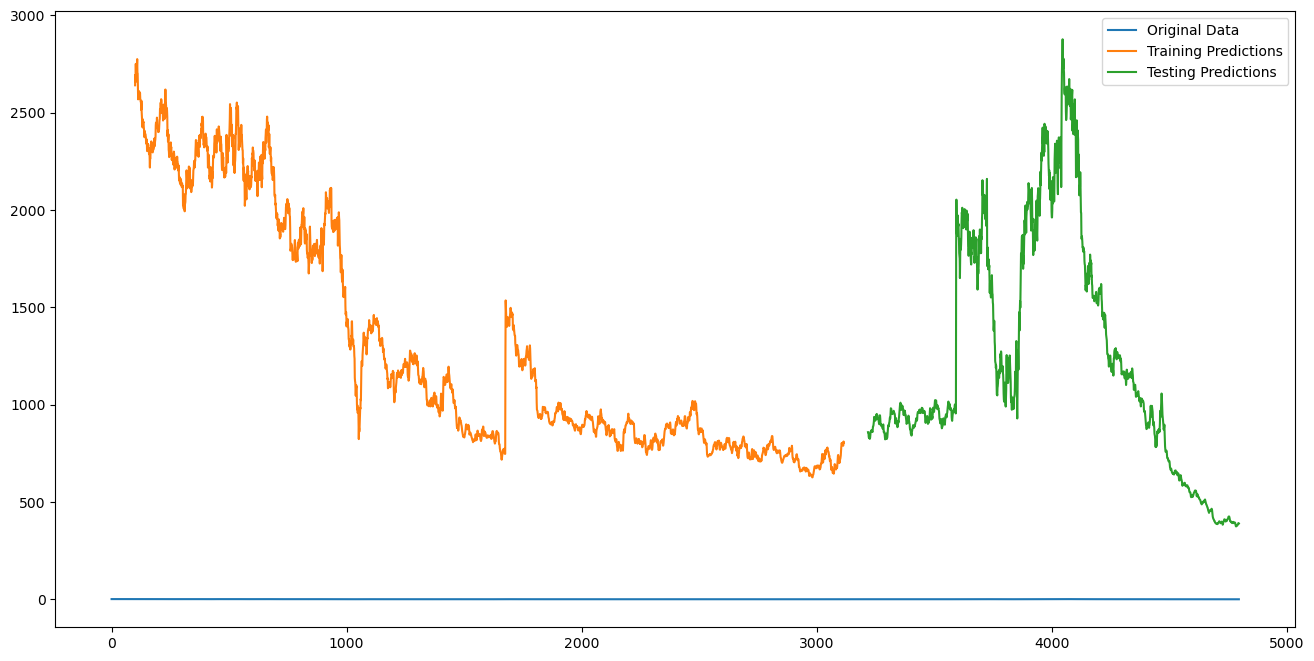

In [36]:
# Plotting the results
plt.figure(figsize=(16,8))
plt.plot(df1, label='Original Data')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Training Predictions')
plt.plot(np.arange(len(df1) - len(test_predict), len(df1)), test_predict, label='Testing Predictions')
plt.legend()
plt.show()

In [37]:
def predict_future(data, steps, model, time_step, scaler):
    future_predictions = []
    current_data = data.reshape(1, time_step, 1)  # Reshape to 3D array for LSTM input
    for _ in range(steps):
        future_price = model.predict(current_data)
        future_predictions.append(future_price[0, 0])
        future_price_reshaped = np.array([[future_price[0, 0]]])  # Reshape future_price correctly
        current_data = np.append(current_data[:, 1:, :], future_price_reshaped.reshape(1, 1, 1), axis=1)  # Correct dimension
    future_predictions = np.array(future_predictions).reshape(-1, 1)
    return scaler.inverse_transform(future_predictions)


In [38]:
# Ensure we are using the latest data from the test set for future predictions
latest_test_data = df1[-time_step:]

In [39]:
future_days = 30  # Predict next 30 days
future_predictions = predict_future(latest_test_data, future_days, model, time_step, scaler)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

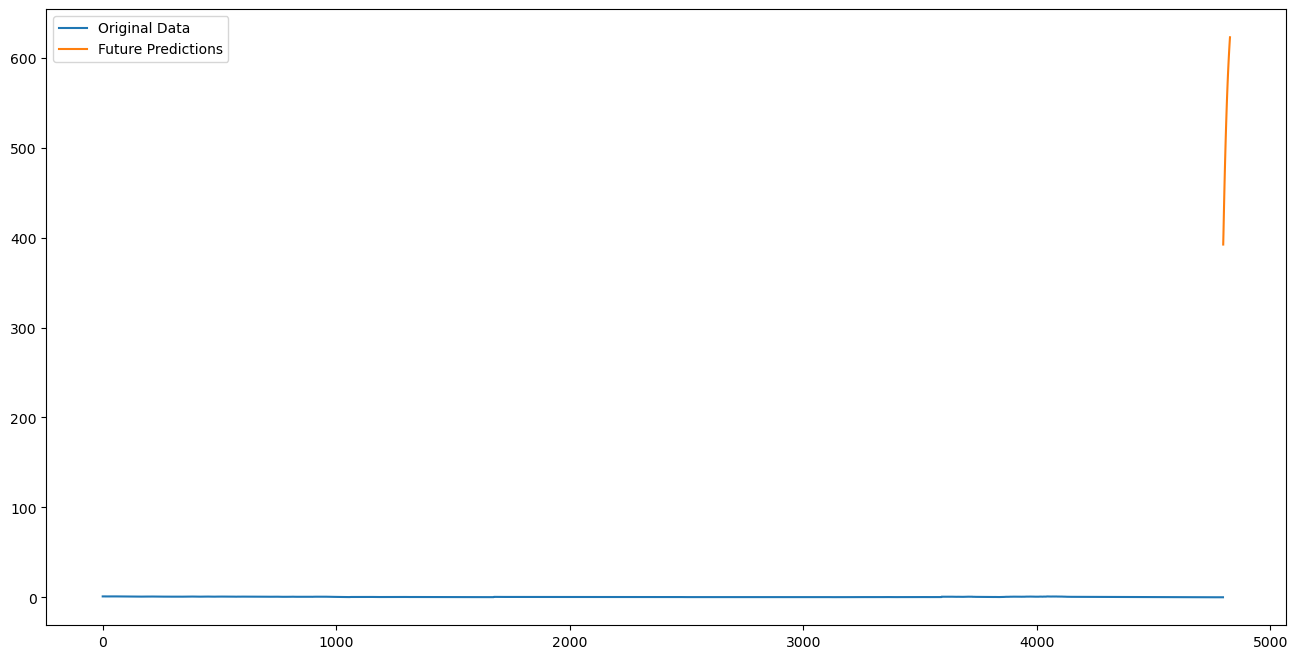

In [40]:
# Plot future predictions
plt.figure(figsize=(16,8))
plt.plot(df1, label='Original Data')
plt.plot(np.arange(len(df1), len(df1) + future_days), future_predictions, label='Future Predictions')
plt.legend()
plt.show()

In [34]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print(rmse)

321.5407365102309


In [35]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

322.9884354144671

df1 shape: (4797, 1)
train_predict shape: (3017, 1)
test_predict shape: (1578, 1)


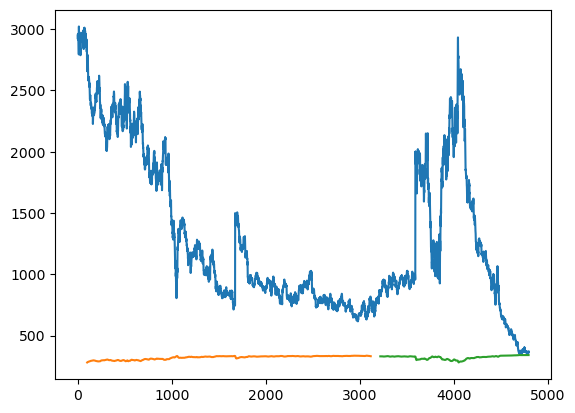

In [37]:
import numpy as np
import matplotlib.pyplot as plt

look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Print shapes for debugging
print(f'df1 shape: {df1.shape}')
print(f'train_predict shape: {train_predict.shape}')
print(f'test_predict shape: {test_predict.shape}')

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
start_idx = len(train_predict) + (look_back * 2) + 1
end_idx = start_idx + len(test_predict)

# Ensure indices are within bounds
if end_idx <= len(df1):
    testPredictPlot[start_idx:end_idx, :] = test_predict
else:
    print(f'Index out of bounds: end_idx ({end_idx}) exceeds df1 length ({len(df1)})')
    end_idx = len(df1)  # Adjust the end index to be within bounds
    testPredictPlot[start_idx:end_idx, :] = test_predict[:(end_idx - start_idx), :]

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

1679

In [39]:
x_input=test_data[1577:].reshape(1,-2)
x_input.shape

(1, 102)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.006421822642810104,
 0.007515438781754008,
 0.00746457204692666,
 0.0074009792984704725,
 0.007388253284841606,
 0.00755357950295249,
 0.004832265169221639,
 0.005798770450629265,
 0.0072484164136764895,
 0.006256496424699248,
 0.009868034597440734,
 0.008850737220581911,
 0.009562759549100547,
 0.010427568680541538,
 0.010783598504644887,
 0.01323789047029822,
 0.012055266875328485,
 0.009982456761036207,
 0.010071464217062037,
 0.009995220094353136,
 0.008278439804164206,
 0.006688882330575713,
 0.010491086789621601,
 0.009588248896046286,
 0.011648295677021692,
 0.01148296945891078,
 0.011495732792227709,
 0.010427568680541538,
 0.007324735175761543,
 0.003230019001692369,
 0.0042981831133785675,
 0.007197549678849169,
 0.011203221077204423,
 0.011991674126872298,
 0.011648295677021692,
 0.014178906404760078,
 0.016289819920562804,
 0.01765049574727226,
 0.013797424553399024,
 0.01609911631457034,
 0.016022797552485285,
 0.011330406574116825,
 0.010580131565335493,
 0.01209340759

In [42]:
# demonstrating prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.00751544 0.00746457 0.00740098 0.00738825 0.00755358 0.00483227
 0.00579877 0.00724842 0.0062565  0.00986803 0.00885074 0.00956276
 0.01042757 0.0107836  0.01323789 0.01205527 0.00998246 0.01007146
 0.00999522 0.00827844 0.00668888 0.01049109 0.00958825 0.0116483
 0.01148297 0.01149573 0.01042757 0.00732474 0.00323002 0.00429818
 0.00719755 0.01120322 0.01199167 0.0116483  0.01417891 0.01628982
 0.0176505  0.01379742 0.01609912 0.0160228  0.01133041 0.01058013
 0.01209341 0.01669679 0.01492918 0.01316153 0.01094892 0.01478934
 0.01786669 0.01539967 0.0183499  0.0175869  0.01959612 0.02193595
 0.02353824 0.0218724  0.02266081 0.02140187 0.01793028 0.01450956
 0.01205527 0.01154656 0.01389916 0.00979168 0.01150846 0.01186449
 0.00972809 0.0082403  0.00840563 0.00857095 0.00848187 0.00955011
 0.01061827 0.01199167 0.01042757 0.00909231 0.00812588 0.00731201
 0.00888884 0.01009692 0.00825306 0.01047844 0.00794782 0.00542994
 0.0012208  0.         0.00129708 0.00249243 0.0029

ValueError: cannot reshape array of size 101 into shape (1,100,1)

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [66]:
len(df1)

4795

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

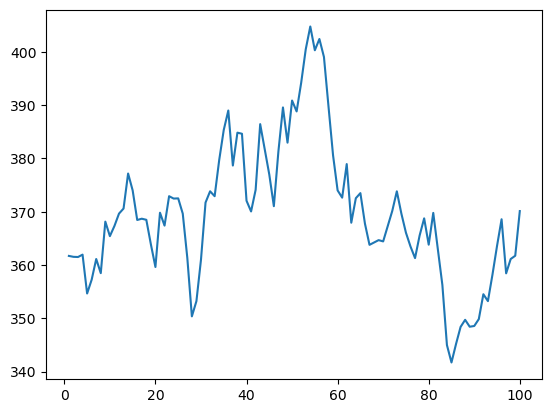

In [73]:
plt.plot(day_new,scaler.inverse_transform(df1[4695:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

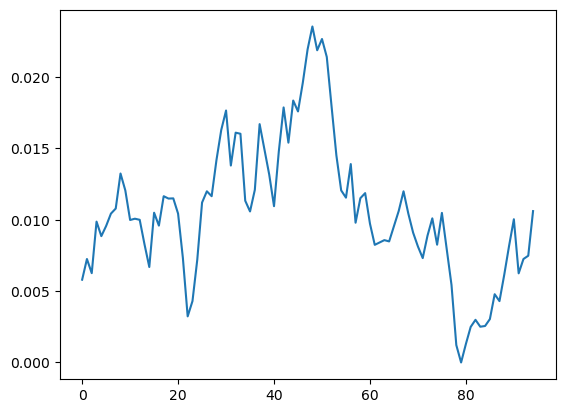

In [70]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4700:])

In [71]:
df3=scaler.inverse_transform(df3).tolist()

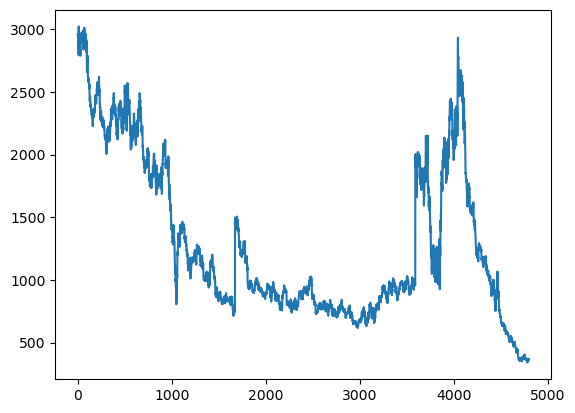

In [72]:
plt.plot(df3)